<a href="https://colab.research.google.com/github/ailab-nda/ML/blob/main/chapter05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第５章の例

In [58]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

# 教師なし学習

## K-means


### モジュールのインポート

In [59]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### サンプルデータの読み込み

In [60]:
url = "https://github.com/rinsaka/sample-data-sets/blob/master/clustering-sample.csv?raw=true"
# url = "clustering-sample.csv"  # カレントディレクトリから読み込む場合
df =pd.read_csv(url)
df

,ID,x,y
0,0,7.4346,6.6520
1,1,6.5419,6.3611
2,2,8.9819,9.2461
3,3,3.8554,4.8386
4,4,1.9527,3.4848
...,...,...,...
295,295,4.1205,1.5010
296,296,9.2843,1.7563
297,297,6.6627,7.3856
298,298,5.7654,6.0543


### 散布図の作成

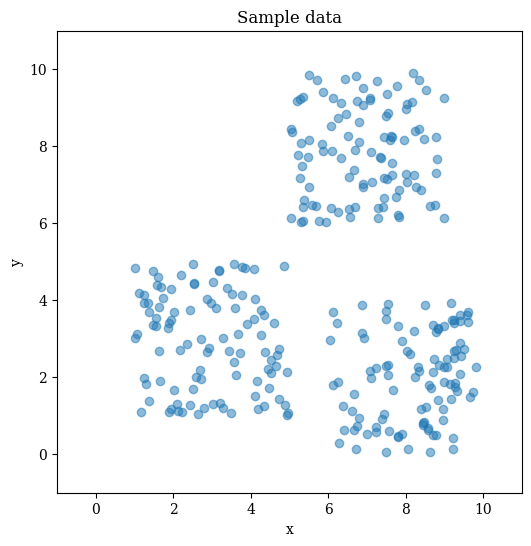

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(df['x'], df['y'], alpha=0.5)
ax.set_title("Sample data")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-1, 11)
ax.set_ylim(-1, 11)
# plt.savefig('cluster_sample.png', dpi=300, facecolor='white')
plt.show()

### 学習

In [ ]:
xy = df.loc[:, ['x', 'y']].values

k = 3
clf = KMeans(n_clusters=k) # モデルの設定
# clf = KMeans(n_clusters=k, random_state=1) # 再現性を持たせたい場合
clf.fit(xy) # クラスタリングの計算
pred = clf.predict(xy) # 計算結果からサンプルデータがどのクラスタに属するかを予測する
df['cluster_id'] = pred

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
colors = ['Red', 'Blue', 'Green']

for cls in range(k):
    x = df.loc[df['cluster_id'] == cls, 'x']
    y = df.loc[df['cluster_id'] == cls, 'y']
    ax.scatter(x, y, alpha=0.5, label=f"cluseter {cls}", color=colors[cls])

ax.set_title("Clustering results")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-1, 11)
ax.set_ylim(-1, 11)
ax.legend(loc='upper left')
# plt.savefig('cluster_scatter.png', dpi=300, facecolor='white')
plt.show()

# 教師あり学習

## 決定木
https://smart-hint.com/ml/tree/

### 事前準備

In [1]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import plot_tree

### データの読み取りと前処理

In [3]:
# タイタニック号のデータ読み取り
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [45]:
# タイタニック号のデータ読み取り
df = sns.load_dataset('titanic')
#df = df.dropna()

# 目的変数と説明変数の分割
df_x = df[['sex','pclass','fare']]
df_y = df['survived']

# 目的変数のダミー変数化
df_x = pd.get_dummies(df_x, drop_first=True)
df_x

,pclass,fare,sex_male
0,3,7.2500,1
1,1,71.2833,0
2,3,7.9250,0
3,1,53.1000,0
4,3,8.0500,1
...,...,...,...
886,2,13.0000,1
887,1,30.0000,0
888,3,23.4500,0
889,1,30.0000,1


### 学習

score:  0.7533632286995515


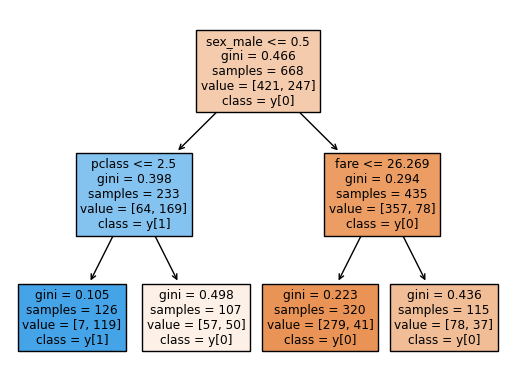

In [57]:
# 学習用-テスト用のデータに分割
train_x, test_x, train_y, test_y = train_test_split(df_x,df_y,random_state=1)

# 決定木モデルの作成
model = tree.DecisionTreeClassifier(max_depth=2, random_state=1)
model.fit(train_x, train_y)

# 決定木モデルの可視化
plot_tree(model, feature_names=train_x.columns, class_names=True, filled=True)

# 決定木モデルのスコア
print("score: ", model.score(test_x,test_y))

## Support Vector Machine

In [56]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

model = SVC()
model.fit(train_x, train_y)
print("score: ", model.score(test_x, test_y))

score:  0.6053811659192825


## Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_x, train_y)
print("score: ", model.score(test_x, test_y))

score:  0.7847533632286996
